In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to your model and data in Google Drive
model_path = '/content/drive/MyDrive/saved models/trained_plant_disease_model.keras'
image_path = '/content/drive/MyDrive/Plant_disease_detection/test/CornCommonRust1.JPG'

In [ ]:
# Load the validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant_disease_detection/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

class_name = validation_set.class_names
print(class_name)

Found 1829 files belonging to 4 classes.
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy']


In [ ]:
# Load the model
cnn = tf.keras.models.load_model(model_path)

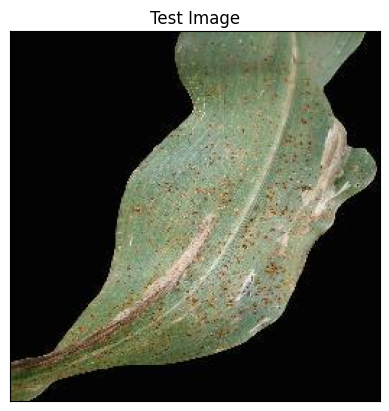

In [ ]:
# Test Image Visualization
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Preparing the image for prediction
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 1s 801ms/step


In [ ]:
print(predictions)

[[1. 0. 0. 0.]]


In [ ]:
# Find the index of the highest confidence
result_index = np.argmax(predictions)

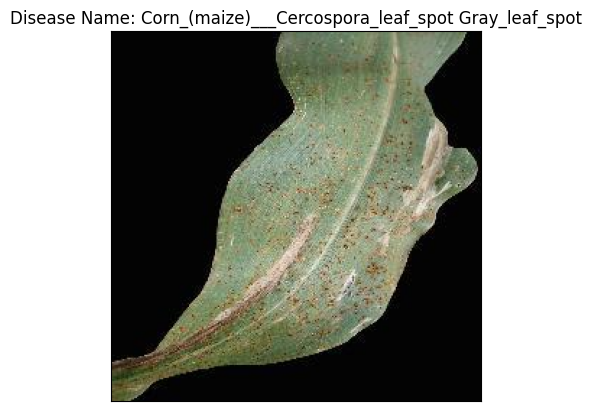

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()